In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def evaluate_policy(env, agent):
    s_k, info = env.reset(seed=cfg_params["random_seed"])
    terminated = False
    sum_reward = 0
    for _ in range(cfg_params["max_episode_steps"]):
        a_k = agent.optimal_action(s_k)
        s_k1, r_k, terminated, _ , info = env.step(a_k)
        sum_reward += r_k
        s_k = s_k1
        if terminated:
            break
    return sum_reward
    

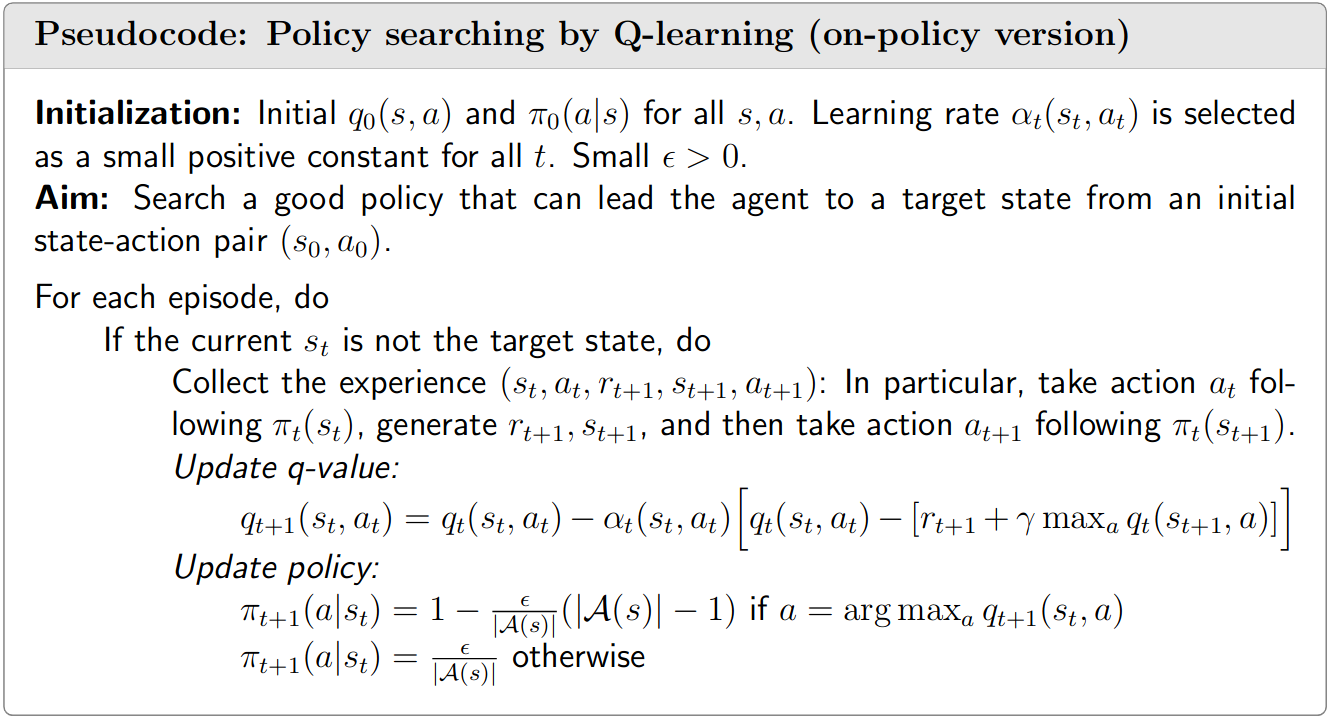

In [3]:
class Agent():
    def __init__(self, action_dim: int, state_dim: int, alpha=0.01, gamma=0.9, epsilon=0.1):
        self.action_dim = action_dim
        self.state_dim = state_dim
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = np.zeros((state_dim, action_dim))  # 查表法 action value: Q(s, a)
    
    def select_action(self, s_k: int) -> int:
        '''use e-greedy policy'''
        self.optimal_action
        if np.random.uniform(0, 1) > self.epsilon:
            a_k = self.optimal_action(s_k)
        else:
            a_k = np.random.choice(self.action_dim)
        return a_k
    
    def optimal_action(self, s_k: int) -> int:
        Q_sk = self.Q[s_k, :]
        optimal_action_list = np.where(Q_sk == np.max(Q_sk))[0]
        return np.random.choice(optimal_action_list)
    
    def other_action(self, s_k: int) -> int:
        Q_sk = self.Q[s_k, :]
        other_action_list = np.where(Q_sk != np.max(Q_sk))[0]
        return np.random.choice(other_action_list)
    
    def train(self, s_k, a_k, r_k, s_k1):
        # QLearning Algorithm
        target_Q = r_k + self.gamma * np.max(self.Q[s_k1, :])
        Q_sa = self.Q[s_k, a_k]
        self.Q[s_k, a_k] += self.alpha* (target_Q - Q_sa)  

In [4]:
# parameter
cfg_params = {
    "env_name" : "CliffWalking-v0",
    "random_seed": 0,
    "max_train_steps": 1000,
    "max_episode_steps": 500,
}

env = gym.make(cfg_params["env_name"]) #  gym.make("CliffWalking-v0", render_mode="human")


Environment Model
$p(r_k\vert s_k, a_k)\\p(s_{k+1}\vert s_k, a_k)$

In [5]:
# make it as a funtion for data analysis

def main_function(alpha, gamma, epsilon=0.1, render=False):
    agent = Agent(
        action_dim=env.action_space.n,
        state_dim=env.observation_space.n,
        alpha=0.2,
        gamma=0.9,
        epsilon=0.1)

    # training
    score_queue = []

    for k in range(cfg_params["max_train_steps"]):
        # reset the s_k
        s_k, info = env.reset(seed=cfg_params["random_seed"])
        # start one episode
        for ek in range(cfg_params["max_episode_steps"]):
            a_k = agent.select_action(s_k)
            s_k1, r_k, terminated, truncated, info = env.step(a_k)
            # key algorithm
            agent.train(s_k, a_k, r_k, s_k1)
            s_k = s_k1
            if terminated:
                break
        score = evaluate_policy(env, agent)
        score_queue.append(score)
        print(f'current step: {k}/{cfg_params["max_train_steps"]}, score: {score}')

    if render:
        evaluate_env = gym.make(cfg_params["env_name"], render_mode="human")
        for _ in range(1):
            evaluate_policy(evaluate_env, agent)
        evaluate_env.close()
    return score_queue


In [6]:
# data analysis

# alpha_list = [0.2, 0.4, 0.6, 0.8]  # w_k1 = wk + alpha * TD_Error

# gamma_list = [0.9, 0.7, 0.5, 0.3, 0.1]  # discounted rate

# # analysis gamma (alpha = 0.2)
# plt.figure()
# for gamma in gamma_list:
#     score_queue = main_function(alpha = 0.2, gamma=gamma)
#     plt.plot(score_queue, label=f'gamma = {gamma}')
# plt.ylabel('score')
# plt.xlabel('step')
# plt.title('Q-Learning')
# plt.legend()


In [7]:
# analysis alpha (gamma = 0.9)
# plt.figure()
# for alpha in alpha_list:
#     score_queue = main_function(alpha = alpha, gamma=0.9)
#     plt.plot(score_queue, label=f'alpha = {alpha}')
# plt.ylabel('score')
# plt.xlabel('step')
# plt.title('Q-Learning')
# plt.legend()

In [ ]:
# play and render
plt.figure()
score_queue = main_function(alpha = 0.2, gamma=0.9, render=True)

plt.plot(score_queue, label="Q")

plt.ylabel('score')
plt.xlabel('step')
plt.title('Q-Learning')
plt.legend()